In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Data Preparation #

# Load data
data = pd.read_csv("spam.csv")

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Data summary statistics
summary_stats = data.describe()
print(summary_stats)

# Data type of the features
print(data.dtypes)

# Exclude the target variable
target_variable = data.iloc[:, -1]

# Check the distribution of the target variable
class_distribution = target_variable.value_counts()

# Print the distribution
print("Class Distribution:")
print(class_distribution)

# Calculate the balance ratio
balance_ratio = class_distribution[1] / class_distribution[0]
print("Balance Ratio:", balance_ratio)

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64
              make      address          all           3d  

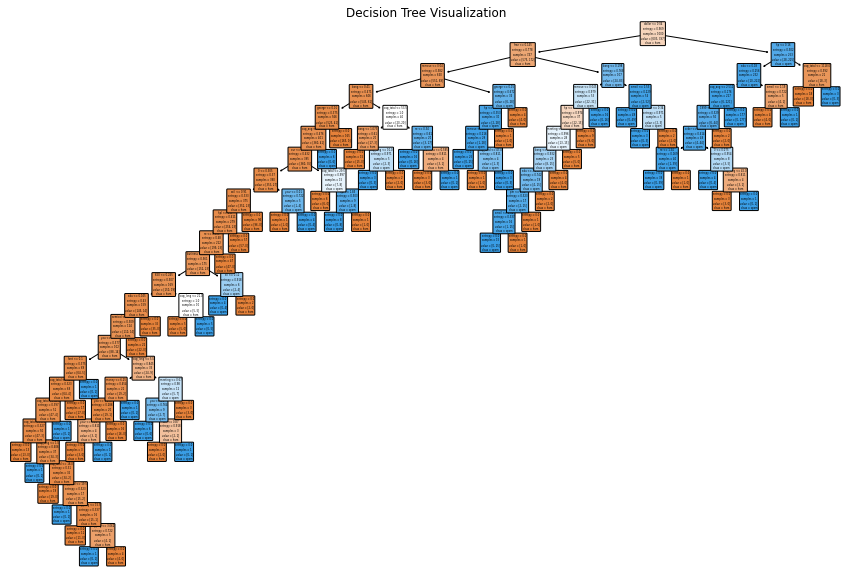

Decision Tree Results:
Accuracy: 0.8919744515412386
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      0.88      0.91      2185
        spam       0.83      0.91      0.87      1416

    accuracy                           0.89      3601
   macro avg       0.88      0.89      0.89      3601
weighted avg       0.90      0.89      0.89      3601

Confusion Matrix:
 [[1926  259]
 [ 130 1286]]

Random Forest (RF_50_auto) Results:
Accuracy: 0.9305748403221328
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      0.95      0.94      2185
        spam       0.92      0.90      0.91      1416

    accuracy                           0.93      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Confusion Matrix:
 [[2070  115]
 [ 135 1281]]

Random Forest (RF_50_sqrt) Results:
Accuracy: 0.9333518467092474
Classification Report:

In [3]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, train_size=1000, test_size=3601, random_state=42)

# Extract features and labels
X_train_dt, y_train_dt = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test_dt, y_test_dt = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train_dt, y_train_dt)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X_train_dt.columns, class_names=['ham', 'spam'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Evaluate Decision Tree
y_pred_dt = dt_classifier.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
classification_report_dt = classification_report(y_test_dt, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Train and Evaluate Random Forest Classifier
def train_and_evaluate_rf(n_estimators, max_features, X_train_rf, y_train_rf, X_test_rf, y_test_rf):
    # Train Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
    rf_classifier.fit(X_train_rf, y_train_rf)

    # Evaluate Random Forest
    y_pred_rf = rf_classifier.predict(X_test_rf)
    accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
    classification_report_rf = classification_report(y_test_rf, y_pred_rf)
    confusion_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

    return accuracy_rf, classification_report_rf, confusion_matrix_rf

# Testing the base learners
n_estimators_list = [50, 500, 5000]
max_features_list = ['auto', 'sqrt']

results_rf = {}
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        key = f"RF_{n_estimators}_{max_features}"
        results_rf[key] = train_and_evaluate_rf(n_estimators, max_features, X_train_dt, y_train_dt, X_test_dt, y_test_dt)


# Decision Tree results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:\n", classification_report_dt)
print("Confusion Matrix:\n", confusion_matrix_dt)

# Random Forest results
for key, result in results_rf.items():
    print(f"\nRandom Forest ({key}) Results:")
    print(f"Accuracy: {result[0]}")
    print("Classification Report:\n", result[1])
    print("Confusion Matrix:\n", result[2])


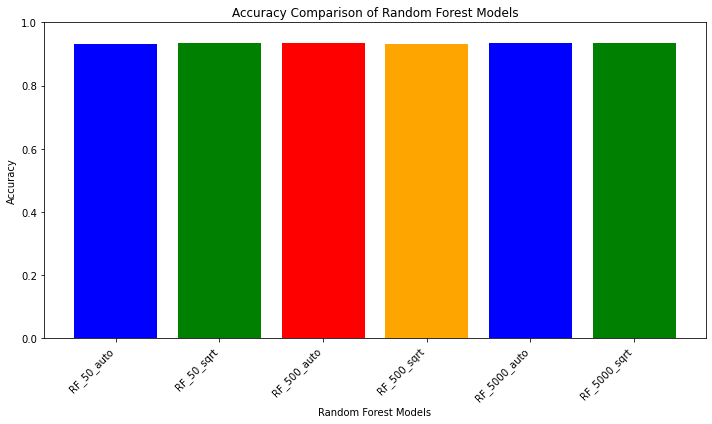

In [4]:
# Extract accuracy values for each Random Forest model
accuracies = [results_rf[key][0] for key in results_rf.keys()]

# Accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results_rf.keys(), accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Accuracy Comparison of Random Forest Models')
plt.xlabel('Random Forest Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limit to ensure a proper scale
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


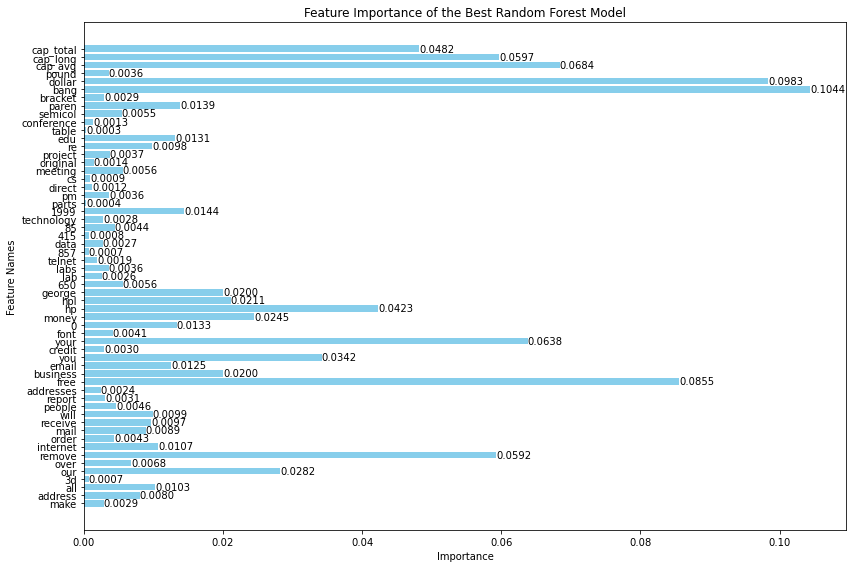

In [5]:
# Extract feature importances from the best Random Forest model
best_rf_model = max(results_rf, key=lambda k: results_rf[k][0])
best_rf_classifier = RandomForestClassifier(n_estimators=int(best_rf_model.split('_')[1]), 
                                            max_features=best_rf_model.split('_')[2])
best_rf_classifier.fit(X_train_dt, y_train_dt)

# Get feature importances and names
feature_importances = best_rf_classifier.feature_importances_
feature_names = X_train_dt.columns

# Feature importance with scores
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_names, feature_importances, color='skyblue')

# Adding importance scores
for bar, score in zip(bars, feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Feature Importance of the Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()


In [6]:
# The best Random Forest model
print(f"\nBest Random Forest Model ({best_rf_model}) Results:")
print(f"Accuracy: {results_rf[best_rf_model][0]}")
print("Classification Report:\n", results_rf[best_rf_model][1])
print("Confusion Matrix:\n", results_rf[best_rf_model][2])



Best Random Forest Model (RF_5000_auto) Results:
Accuracy: 0.9358511524576506
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      0.95      0.95      2185
        spam       0.92      0.91      0.92      1416

    accuracy                           0.94      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.94      0.94      0.94      3601

Confusion Matrix:
 [[2078  107]
 [ 124 1292]]


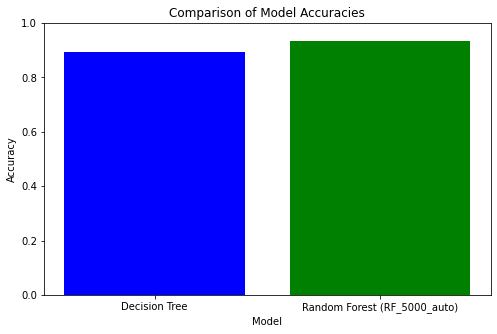

In [7]:
# Comparing Accuracy of Decision Tree and Random Forest
accuracies = [accuracy_dt, results_rf[best_rf_model][0]]
models = ['Decision Tree', f'Random Forest ({best_rf_model})']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()